In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lg

In [4]:
df = pd.read_csv(r'kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
def get_year(string):
    return int(string[:4])

In [7]:
df['date'] = df['date'].map(str)

In [8]:
df['yr_sell'] = df['date'].map(get_year)

In [9]:
df['age'] = df['yr_sell'] - df['yr_built']

In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sell,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


We have calculated the age of the houses by getting the year of sold from the 'date' feature and substract the 'year of built'.
Our df now includes two more columns : yr_solde & age

In [11]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sell,age
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.021217
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.053951
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.154324
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,-0.506407
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,-0.318488
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.052990
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,-0.489640
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.026093
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,0.053458
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.360665


Let's plot some data !

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

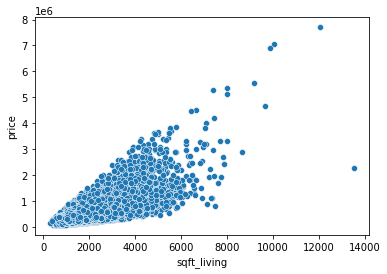

In [12]:
import seaborn as sns
df_prsqrtliv = df[['sqft_living','price']]
sns.scatterplot(x = df_prsqrtliv['sqft_living'], y = df_prsqrtliv['price'], data = df_prsqrtliv)

From the correlation matrix, the coeff between our traget 'price' and the feature 'surface of the living room' is 0.7. By plotting price = f(sqrt_living), we could confirm a good "positive linear correlation"

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

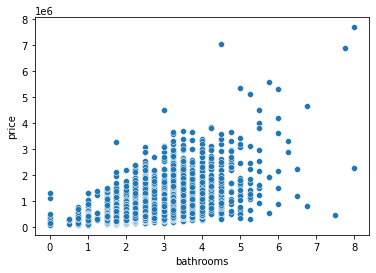

In [13]:
df_prbath = df[['bathrooms','price']]
sns.scatterplot(x = df_prbath['bathrooms'], y = df_prbath['price'], data = df_prbath)

From the correlation matrix, the coeff between our traget 'price' and the feature 'nbr of bathroom' is 0.525. By plotting price = f(bathroom), we could detect more or less a "positive linear correlation"

<AxesSubplot:xlabel='grade', ylabel='price'>

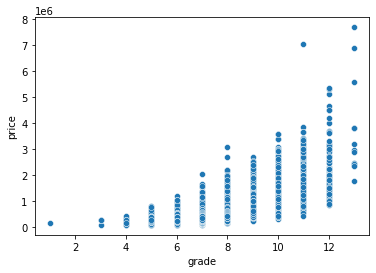

In [14]:
df_prgrade = df[['grade','price']]
sns.scatterplot(x = df_prgrade['grade'], y = df_prgrade['price'], data = df_prgrade)

From the correlation matrix, the coeff between our traget 'price' and the feature 'nbr of bathroom' is 0.67. By plotting price = f(grade), we could detect more or less a "positive linear correlation"

<AxesSubplot:xlabel='age', ylabel='price'>

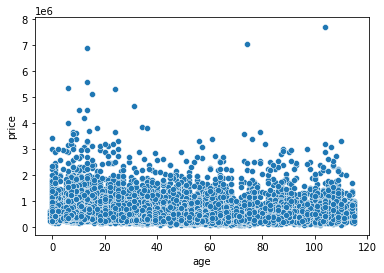

In [15]:
df_prage = df[['age','price']]
sns.scatterplot(x = df_prage['age'], y = df_prage['price'], data = df_prage)

For the feature "age", unfortunately, the correlation coeddicient is -0.05. There is a bad/no corelation between this feature and our target "price" (confirmed as well by the scatter plot)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

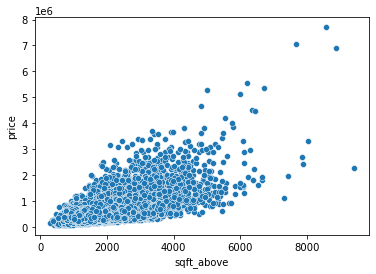

In [16]:
df_prabove = df[['sqft_above','price']]
sns.scatterplot(x = df_prabove['sqft_above'], y = df_prabove['price'], data = df_prabove)

From the correlation matrix, the coeff between our traget 'price' and the feature 'surface above the house' is 0.6. By plotting price = f(sqrt_living), we could confirm a good "positive linear correlation"

### Selected features

Based on the above quick analysis, to perfrom a regression model for our target "price", we will select the following features : sqrt_living, bathrooms, grade, sqrt_above 

## Linear Regression

For our linear regression model, we will select the feature with the higest correlation coeff "sqrt_living" to build the model for our target "price"

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics

In [18]:
df_linearregression = df[['sqft_living', 'price']]
df_linearregression.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


### Model built

In [19]:
Xl = df_linearregression['sqft_living'].values[:,np.newaxis]
Yl = df_linearregression['price'].values

Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(Xl, Yl, test_size = 0.2, random_state = 40)

In [20]:
linearmodel = lg()
linearmodel.fit(Xl_train, Yl_train)
linear_prediction = linearmodel.predict(Xl_test)

In [21]:
print("Model slope : ", linearmodel.coef_)
print("Model bias : ", linearmodel.intercept_)

Model slope :  [282.4452088]
Model bias :  -47399.245995821664


### Model Metrics

In [22]:
print("Model mean squared error : ", MSE(Yl_test,linear_prediction))
print("Model R squared : ", metrics.r2_score(Yl_test,linear_prediction))

Model mean squared error :  62451720102.954
Model R squared :  0.5035535751151091


### Linear Model Plot

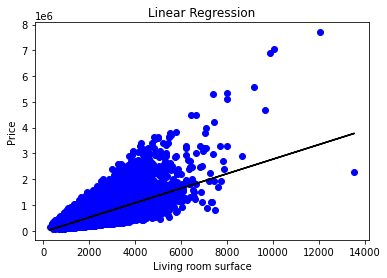

In [26]:
plt.scatter(Xl,Yl,color="b")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Living room surface")
plt.plot(Xl,linearmodel.predict(Xl),color="k")
plt.show()

# Multiple Linear Regression

For our multiple linear regression model, we will select all the features we have selected previously to build the model for our target "price"

In [27]:
df_multiregression = df[['sqft_living', 'bathrooms', 'grade', 'sqft_above','price']]
df_multiregression.head()

,sqft_living,bathrooms,grade,sqft_above,price
0,1180,1.00,7,1180,221900.0
1,2570,2.25,7,2170,538000.0
2,770,1.00,6,770,180000.0
3,1960,3.00,7,1050,604000.0
4,1680,2.00,8,1680,510000.0


In [28]:
Xm = df_multiregression[['sqft_living', 'bathrooms', 'grade', 'sqft_above']]
Ym = df_multiregression['price'].values

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm, Ym, test_size = 0.2, random_state = 40)

In [30]:
multilinearmodel = lg()
multilinearmodel.fit(Xm_train, Ym_train)
multilinear_prediction = multilinearmodel.predict(Xm_test)

In [32]:
print("Model coefficients : ", multilinearmodel.coef_)
print("Model bias : ", multilinearmodel.intercept_)

Model coefficients :  [ 2.52937246e+02 -3.58411960e+04  1.15982838e+05 -7.69980529e+01]
Model bias :  -660769.8227356651


### Model Metrics

In [33]:
print("Model mean squared error : ", MSE(Ym_test,multilinear_prediction))
print("Model R squared : ", metrics.r2_score(Ym_test,multilinear_prediction))

Model mean squared error :  56006409956.61068
Model R squared :  0.5547891723757057


# Polynomial Regression

We will try to predict our target from the selected features using polynomial regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
polymodel = lg()
poly = PolynomialFeatures(degree = 2)

In [39]:
df_poly = df[['sqft_living', 'bathrooms', 'grade', 'sqft_above','price']]
df_poly.head()

,sqft_living,bathrooms,grade,sqft_above,price
0,1180,1.00,7,1180,221900.0
1,2570,2.25,7,2170,538000.0
2,770,1.00,6,770,180000.0
3,1960,3.00,7,1050,604000.0
4,1680,2.00,8,1680,510000.0


In [41]:
X = df_poly[['sqft_living', 'bathrooms', 'grade', 'sqft_above']]
Yp = df_poly['price'].values

X_train, X_test, Yp_train, Yp_test = train_test_split(X, Yp, test_size = 0.2, random_state = 40)

In [43]:
Xp_train = poly.fit_transform(X_train)
polymodel.fit(Xp_train,Yp_train)
Xp_test = poly.fit_transform(X_test)
poly_prediction = polymodel.predict(Xp_test)

In [44]:
print("Model coefficients : ", polymodel.coef_)
print("Model bias : ", polymodel.intercept_)

Model coefficients :  [ 0.00000000e+00 -3.20165317e+02 -1.61502852e+05 -7.30628522e+04
  2.17815245e+02 -8.10637117e-02 -1.97991051e+01  7.52526502e+01
  1.98860457e-01  2.81758796e+04  7.45242368e+03  6.89797675e+00
  7.28762333e+03 -5.41756548e+01 -1.00351229e-01]
Model bias :  538711.4811079454


### Model Metrics

In [45]:
print("Model mean squared error : ", MSE(Yp_test,poly_prediction))
print("Model R squared : ", metrics.r2_score(Yp_test,poly_prediction))

Model mean squared error :  49637385552.73096
Model R squared :  0.6054183526464529


# Recap

By calculating each model metrics (MSE & R squared), we could confirm that the "polynomial regression" model has the better perfromance among all the 3 used methods

### Linear :

In [47]:
print("Linear Model mean squared error : ", MSE(Yl_test,linear_prediction))
print("Linear Model R squared : ", metrics.r2_score(Yl_test,linear_prediction))

Linear Model mean squared error :  62451720102.954
Linear Model R squared :  0.5035535751151091


### Multi Linear

In [48]:
print("Multi Linear Model mean squared error : ", MSE(Ym_test,multilinear_prediction))
print("Multi LinearModel R squared : ", metrics.r2_score(Ym_test,multilinear_prediction))

Multi Linear Model mean squared error :  56006409956.61068
Multi LinearModel R squared :  0.5547891723757057


### Polynomial

In [49]:
print("Polynomial Regression Model mean squared error : ", MSE(Yp_test,poly_prediction))
print("Polynomial RegressionModel R squared : ", metrics.r2_score(Yp_test,poly_prediction))

Polynomial Regression Model mean squared error :  49637385552.73096
Polynomial RegressionModel R squared :  0.6054183526464529
